
# -------------- Auxiliar 8 --------------

## AS4501-1 

<font size='3'> Profs. Valentino Gonzalez, Francisco Förster

<font size='3'> Author: P. Cáceres Burgos

# ------------------------------------------


In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

/Users/pola/astroinf_env/lib/python3.8/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# En esta clase entrenaremos una red neuronal para que clasifique entre tipos de Ropa, a partir de la set de datos fashion_mnist



In [2]:
%load_ext tensorboard

In [3]:
os.environ['TENSORBOARD_BINARY'] = '/Users/pola/astroinf_env/bin/tensorboard'

In [4]:
rm -rf ./logs/

## Paso 1. 

Descargamos los datos, que estan separados entre imagenes de entrenamiento y test

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images.shape[0]

60000

## Visualizemos como se ven nuestros datos!

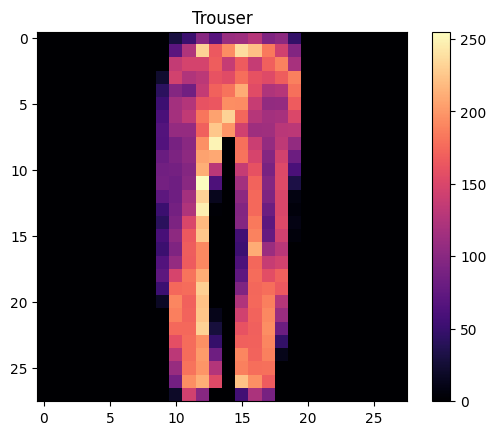

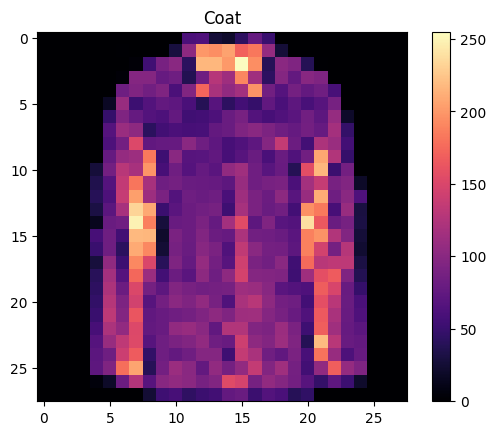

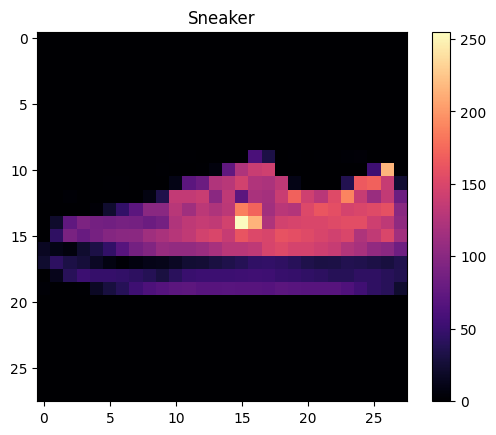

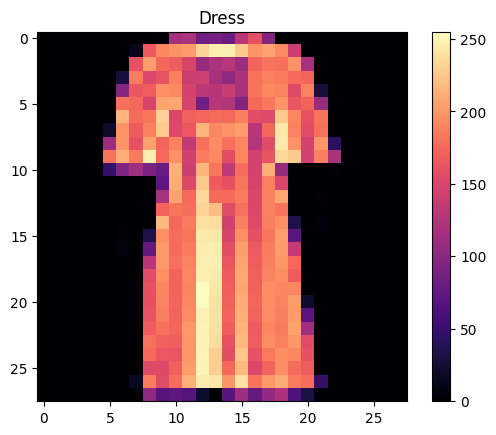

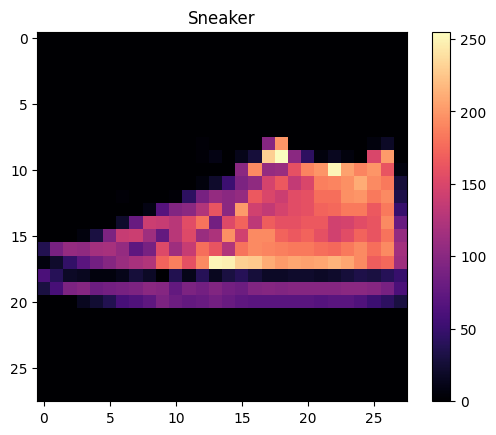

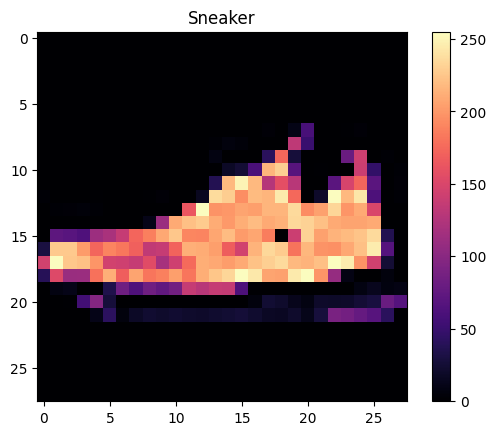

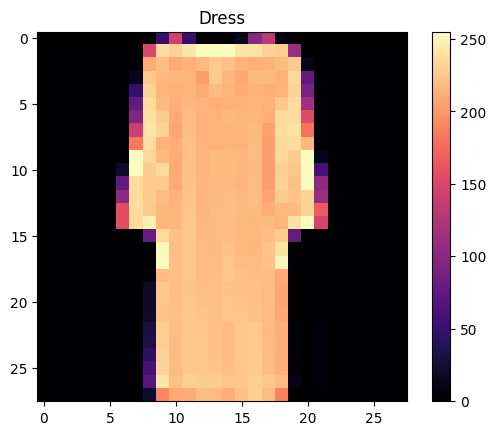

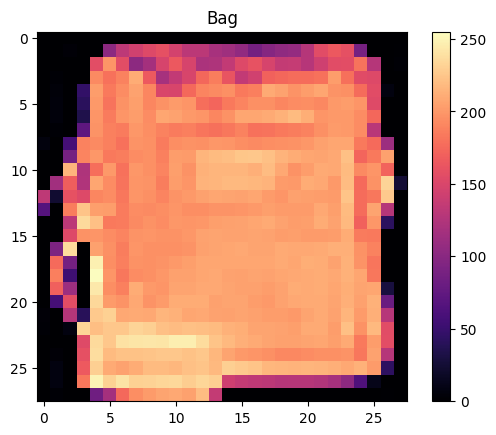

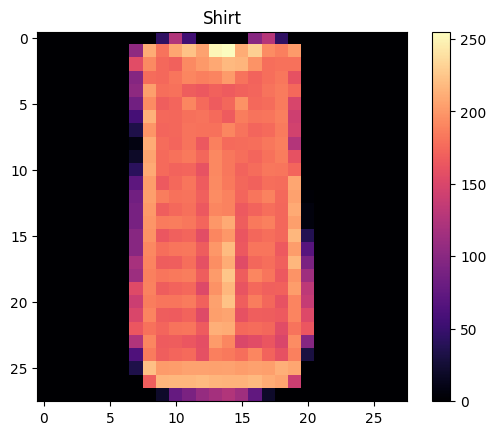

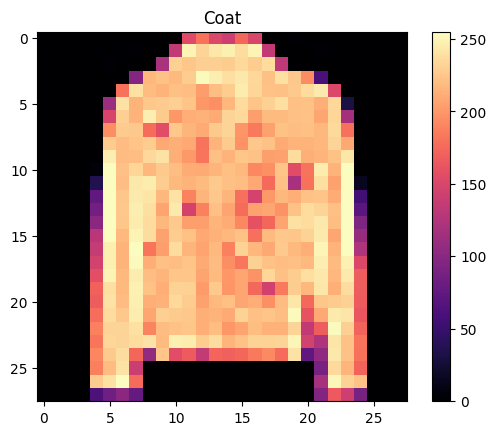

In [24]:
np.random.seed(123)
for i in np.random.choice(range(train_images.shape[0]), size=10):

    plt.figure()
    plt.title('{}'.format(class_names[train_labels[i]]))
    plt.imshow(train_images[i], cmap='magma')
    plt.colorbar()
    plt.grid(False)
    plt.show()

# Paso 2. 
Creamos nuestra red neuronal

In [7]:
model = Sequential(name='ropa_classifier')

model.add(Flatten(input_shape=(28,28))) # Aplanamos los datos para que entren como 1 dimension
model.add(Dense(128, activation='relu')) # Capa con 128 neuronas
model.add(Dense(10, activation='softmax')) # Capa exterior con 10 neuronas porque clasificamos 10 clases de ropa

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### Hay que tener cuidado con no overfitear nuestro clasificador !!!!

#early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, 
#                                                       restore_best_weights=True)

model.summary()

Model: "ropa_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##  (Paso adicional - aparte) Aqui abajo probemos con un ejemplo que overfitea la clasificacion, y veamos como se ven las métricas 

In [8]:
# Compilamos nuestro modelo, definimos el optimizador, el loss y la metrica que queremos evaluar 

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Corramos el modelo!

history = model.fit(train_images, train_labels, epochs=16, 
                    batch_size=32, validation_split=0.2,
                   callbacks=[tensorboard_callback])#, early_stop_callback])

Epoch 1/16
1500/1500 [==============================] - 15s 9ms/step - loss: 3.8848 - accuracy: 0.6795 - val_loss: 0.8416 - val_accuracy: 0.7150
Epoch 2/16
1500/1500 [==============================] - 1s 996us/step - loss: 0.7288 - accuracy: 0.7244 - val_loss: 0.6728 - val_accuracy: 0.7466
Epoch 3/16
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6061 - accuracy: 0.7832 - val_loss: 0.6302 - val_accuracy: 0.7934
Epoch 4/16
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5740 - accuracy: 0.7998 - val_loss: 0.6178 - val_accuracy: 0.7949
Epoch 5/16
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5384 - accuracy: 0.8140 - val_loss: 0.5421 - val_accuracy: 0.8198
Epoch 6/16
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5243 - accuracy: 0.8191 - val_loss: 0.5492 - val_accuracy: 0.8202
Epoch 7/16
1500/1500 [==============================] - 1s 916us/step - loss: 0.5109 - accuracy: 0.8247 - val_loss: 0.5745 - val_accu

In [10]:
%tensorboard --logdir logs/fit


Reusing TensorBoard on port 6006 (pid 13730), started 16:44:28 ago. (Use '!kill 13730' to kill it.)

In [174]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 358us/step


In [175]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)
  
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

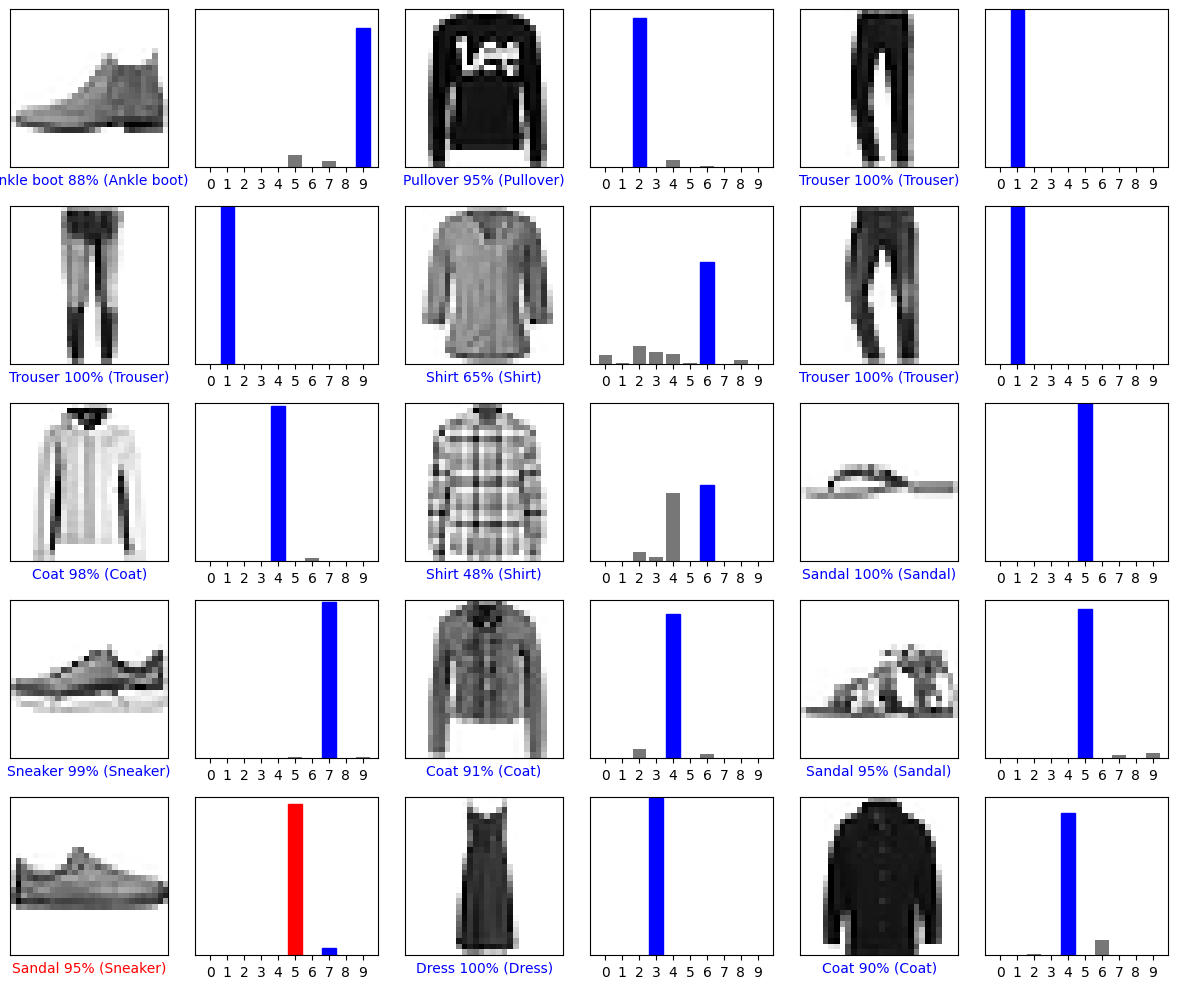

In [180]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [97]:
predictions

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.8450221e-01,
        1.2212178e-16, 5.7195890e-01],
       [1.0213541e-01, 2.4674501e-02, 1.9823395e-01, ..., 2.5563510e-02,
        1.0472812e-01, 4.0592700e-02],
       [1.0572379e-31, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.0213541e-01, 2.4674501e-02, 1.9823395e-01, ..., 2.5563510e-02,
        1.0472812e-01, 4.0592700e-02],
       [6.4214849e-23, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.2368491e-03,
        5.0366816e-07, 4.7430275e-03]], dtype=float32)

In [177]:
pred_unique_label = [np.argmax(k) for k in predictions]

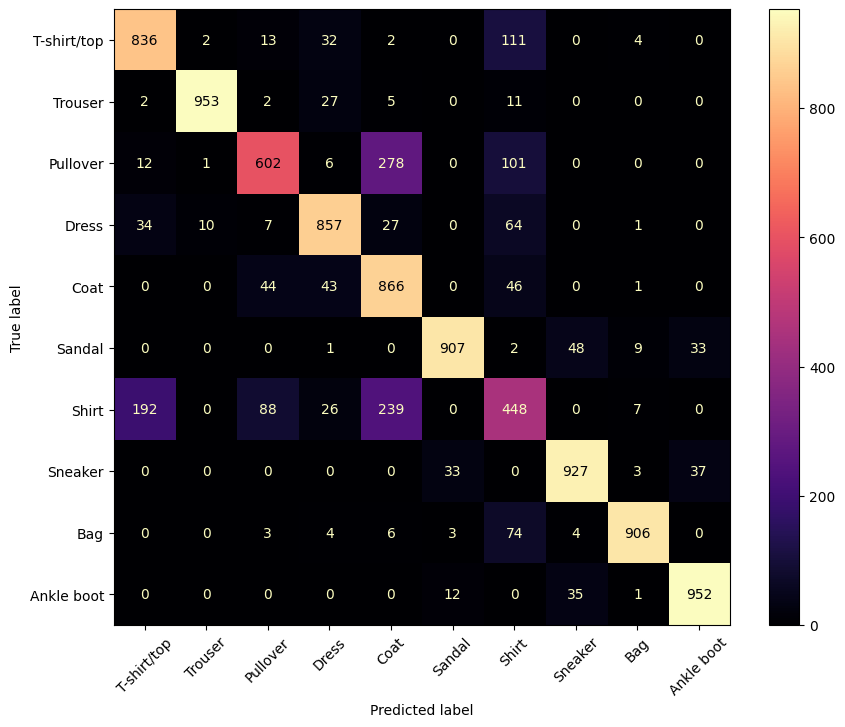

In [178]:
# Simple model

fig, ax = plt.subplots(figsize=(10, 8))

cm = confusion_matrix(test_labels, pred_unique_label)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

disp.plot(cmap='magma', xticks_rotation=45, ax = ax)

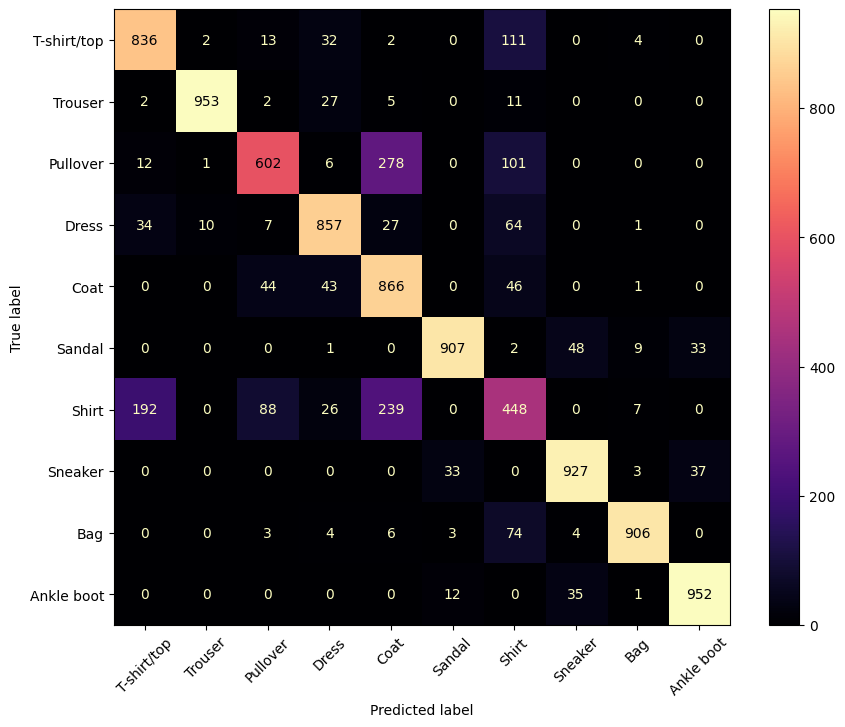

In [179]:
# Overfitting example

fig, ax = plt.subplots(figsize=(10, 8))

cm = confusion_matrix(test_labels, pred_unique_label)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

disp.plot(cmap='magma', xticks_rotation=45, ax = ax)

For other methods to hande overfitting, you can revise this paper https://iopscience.iop.org/article/10.1088/1742-6596/1168/2/022022/pdf

